In [1]:
%run IDM_helper_functions.ipynb

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [3]:
import pandas as pd
import os
import pyreadr
import seaborn as sns
import scipy

In [15]:
data_dir = "/Users/wangjiashun/Desktop/Ballard2019/trimmed_data.csv"
sample_size = 35
df = pd.read_csv(data_dir, sep = ",")
df = df[['s', 'Diff', 'Inc', "RT", "iscorrect"]] # RT max 2.015
df

,s,Diff,Inc,RT,iscorrect
0,1,hard,gain,1.242,0
1,1,med,gain,0.700,0
2,1,easy,gain,0.696,1
3,1,hard,gain,0.589,1
4,1,hard,gain,0.607,1
...,...,...,...,...,...
26626,35,med,loss,0.727,0
26627,35,easy,loss,0.584,0
26628,35,easy,loss,0.623,1
26629,35,easy,loss,0.595,1


In [36]:
Difficulty = ["med", "easy", "hard"]
Incentive = ["gain", "loss", "none"]

In [38]:
df_sub_cond

,s,Diff,Inc,RT,iscorrect
1,1,med,gain,0.700,0
8,1,med,gain,0.682,0
17,1,med,gain,0.504,0
19,1,med,gain,0.824,0
21,1,med,gain,0.570,1
...,...,...,...,...,...
739,1,med,gain,0.943,0
742,1,med,gain,1.210,1
743,1,med,gain,0.953,0
744,1,med,gain,1.823,1


In [40]:
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Participant', 'Difficulty','Incentive', 'Drift Rate',
                                 'Boundary Separation','Non-decision Time','Effective Inhibition'],)

#i=1
for i in range(35):
    for j in range(1):
        for k in range(3):

            print(i)
            df_sub = df[df["s"]==(i+1)]
            df_sub_cond = df_sub[df_sub["Diff"]==Difficulty[j]]
            df_sub_cond = df_sub_cond[df_sub_cond["Inc"]==Incentive[k]]
            
            samp = Sample.from_pandas_dataframe(df_sub_cond, rt_column_name="RT", correct_column_name="iscorrect")

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftLinear(drift=Fittable(minval=0, maxval=4),
                                            t = 0,
                                            x=Fittable(minval=-10, maxval=10)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=3)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.001, dt=.001, T_dur=2.1)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)

            df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({
                                   'Participant': i+1,
                                   'Difficulty': Difficulty[j],
                                   'Incentive': Incentive[k],
                                   'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                                   'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                                   'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                                   'Effective Inhibition': np.array(model_fit.parameters()['drift']['x'])
                                  }, index=[i+1])

            df_all = df_all.append(df_sub)
            df_all.to_csv("OUMresultBallard2019.csv")
            print(df_sub)


0


Info: Params [0.09109849 3.08377562 2.80280686 0.11422898] gave 173.16107246413756


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
1            1        med      gain    0.091098             2.802807   

   Non-decision Time  Effective Inhibition  
1           0.114229              3.083776  
0


Info: Params [0.14198909 2.05528995 2.29385409 0.18492374] gave 221.25646800561114


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
1            1        med      loss    0.141989             2.293854   

   Non-decision Time  Effective Inhibition  
1           0.184924               2.05529  
0


Info: Params [0.04365379 2.21729335 2.96074909 0.13967087] gave 214.85557396543095


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
1            1        med      none    0.043654             2.960749   

   Non-decision Time  Effective Inhibition  
1           0.139671              2.217293  
1


Info: Params [0.29726173 3.07381843 2.96247902 0.28872739] gave 162.51911359564932


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      gain    0.297262             2.962479   

   Non-decision Time  Effective Inhibition  
2           0.288727              3.073818  
1


Info: Params [0.09674417 2.66325553 2.80284417 0.22169062] gave 190.55813330681875


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      loss    0.096744             2.802844   

   Non-decision Time  Effective Inhibition  
2           0.221691              2.663256  
1


Info: Params [0.07547214 2.35862147 2.73933388 0.10090906] gave 208.39552026418355


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      none    0.075472             2.739334   

   Non-decision Time  Effective Inhibition  
2           0.100909              2.358621  
2


Info: Params [ 0.20415829 -0.12941774  0.56435645  0.21905712] gave 94.71269317104768


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      gain    0.204158             0.564356   

   Non-decision Time  Effective Inhibition  
3           0.219057             -0.129418  
2


Info: Params [0.17805916 6.81688138 1.11805627 0.17534838] gave 24.176218037498323


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      loss    0.178059             1.118056   

   Non-decision Time  Effective Inhibition  
3           0.175348              6.816881  
2


Info: Params [0.11227677 8.52966664 0.64851716 0.21939528] gave -17.676180186671242


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      none    0.112277             0.648517   

   Non-decision Time  Effective Inhibition  
3           0.219395              8.529667  
3


Info: Params [0.43008876 4.02245084 2.95022186 0.1389056 ] gave 108.35843116413858


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      gain    0.430089             2.950222   

   Non-decision Time  Effective Inhibition  
4           0.138906              4.022451  
3


Info: Params [0.39264535 3.3011843  1.81279245 0.10087997] gave 149.4655229786074


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      loss    0.392645             1.812792   

   Non-decision Time  Effective Inhibition  
4            0.10088              3.301184  
3


Info: Params [0.42334728 0.32704828 0.75951817 0.21700071] gave 165.6633959383972


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      none    0.423347             0.759518   

   Non-decision Time  Effective Inhibition  
4           0.217001              0.327048  
4


Info: Params [0.         3.37790139 0.93722436 0.28432471] gave 121.22644238845925


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      gain         0.0             0.937224   

   Non-decision Time  Effective Inhibition  
5           0.284325              3.377901  
4


Info: Params [0.03919278 4.3641624  1.39058126 0.27924168] gave 107.77650536371695


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      loss    0.039193             1.390581   

   Non-decision Time  Effective Inhibition  
5           0.279242              4.364162  
4


Info: Params [ 0.10561838 -1.52372631  0.50175914  0.39823402] gave 80.87143965612995


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      none    0.105618             0.501759   

   Non-decision Time  Effective Inhibition  
5           0.398234             -1.523726  
5


Info: Params [0.43875671 2.69797193 2.58633946 0.106166  ] gave 168.72755746472205


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      gain    0.438757             2.586339   

   Non-decision Time  Effective Inhibition  
6           0.106166              2.697972  
5


Info: Params [0.08424532 2.79861945 2.62127875 0.10123764] gave 185.95676293288585


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      loss    0.084245             2.621279   

   Non-decision Time  Effective Inhibition  
6           0.101238              2.798619  
5


Info: Params [0.34864348 2.10234685 1.68718458 0.10094784] gave 102.71381290352969


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      none    0.348643             1.687185   

   Non-decision Time  Effective Inhibition  
6           0.100948              2.102347  
6


Info: Params [0.06878503 2.28857915 1.74209393 0.10062897] gave 210.87224510395436


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      gain    0.068785             1.742094   

   Non-decision Time  Effective Inhibition  
7           0.100629              2.288579  
6


Info: Params [0.         3.20852303 2.5684133  0.12173482] gave 162.16400224622222


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      loss         0.0             2.568413   

   Non-decision Time  Effective Inhibition  
7           0.121735              3.208523  
6


Info: Params [0.21594957 2.26354547 1.53795116 0.10569619] gave 205.5282456270876


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      none     0.21595             1.537951   

   Non-decision Time  Effective Inhibition  
7           0.105696              2.263545  
7


Info: Params [1.16182676 3.87496835 1.48637995 0.45685561] gave 67.3399284916046


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      gain    1.161827              1.48638   

   Non-decision Time  Effective Inhibition  
8           0.456856              3.874968  
7


Info: Params [1.17881765 4.64993739 1.04437189 0.48093734] gave 39.734442456104304


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      loss    1.178818             1.044372   

   Non-decision Time  Effective Inhibition  
8           0.480937              4.649937  
7


Info: Params [0.86670463 4.93775377 2.97294859 0.26896593] gave 62.070520125936255


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      none    0.866705             2.972949   

   Non-decision Time  Effective Inhibition  
8           0.268966              4.937754  
8


Info: Params [0.         5.70326116 1.13000921 0.19371821] gave 59.080034911842084


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      gain         0.0             1.130009   

   Non-decision Time  Effective Inhibition  
9           0.193718              5.703261  
8


Info: Params [0.         5.13653382 1.73333453 0.10321781] gave 75.77475435537892


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      loss         0.0             1.733335   

   Non-decision Time  Effective Inhibition  
9           0.103218              5.136534  
8


Info: Params [0.         4.95448032 1.58039874 0.10007969] gave 88.3433240087071


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      none         0.0             1.580399   

   Non-decision Time  Effective Inhibition  
9            0.10008               4.95448  
9


Info: Params [0.39406297 4.25436267 2.92983254 0.28109608] gave 103.93630242317715


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      gain    0.394063             2.929833   

    Non-decision Time  Effective Inhibition  
10           0.281096              4.254363  
9


Info: Params [0.0990876  4.52698899 2.99575081 0.13135552] gave 97.93569600490443


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      loss    0.099088             2.995751   

    Non-decision Time  Effective Inhibition  
10           0.131356              4.526989  
9


Info: Params [0.31127401 3.73991501 2.81459373 0.14420557] gave 129.56138505010242


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      none    0.311274             2.814594   

    Non-decision Time  Effective Inhibition  
10           0.144206              3.739915  
10


Info: Params [1.36544667 2.03629703 1.87224207 0.29480576] gave 124.37950294211234


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      gain    1.365447             1.872242   

    Non-decision Time  Effective Inhibition  
11           0.294806              2.036297  
10


Info: Params [1.35920915 2.56139419 2.9207463  0.1480157 ] gave 114.35508295336888


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      loss    1.359209             2.920746   

    Non-decision Time  Effective Inhibition  
11           0.148016              2.561394  
10


Info: Params [1.2940671  1.89359657 2.85644227 0.20037565] gave 136.3976696186891


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      none    1.294067             2.856442   

    Non-decision Time  Effective Inhibition  
11           0.200376              1.893597  
11


Info: Params [ 0.06623077 -1.80579372  0.5125271   0.2241239 ] gave 92.50286100997766


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      gain    0.066231             0.512527   

    Non-decision Time  Effective Inhibition  
12           0.224124             -1.805794  
11


Info: Params [ 0.01647543 -2.23252709  0.50217005  0.24031012] gave 88.42664293249456


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      loss    0.016475              0.50217   

    Non-decision Time  Effective Inhibition  
12            0.24031             -2.232527  
11


Info: Params [ 0.         -3.28785651  0.52399718  0.27563332] gave 132.37413732945527


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      none         0.0             0.523997   

    Non-decision Time  Effective Inhibition  
12           0.275633             -3.287857  
12


Info: Params [ 0.618895   -0.68622835  0.79379459  0.42390969] gave 204.69846317053515


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      gain    0.618895             0.793795   

    Non-decision Time  Effective Inhibition  
13            0.42391             -0.686228  
12


Info: Params [1.3075569  2.88574632 1.69587436 0.25758978] gave 98.40101011305313


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      loss    1.307557             1.695874   

    Non-decision Time  Effective Inhibition  
13            0.25759              2.885746  
12


Info: Params [0.77522345 1.05799121 0.81528372 0.37504919] gave 141.37837423565804


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      none    0.775223             0.815284   

    Non-decision Time  Effective Inhibition  
13           0.375049              1.057991  
13


Info: Params [1.1574372  2.99086518 2.77940301 0.10087887] gave 105.95103290747221


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      gain    1.157437             2.779403   

    Non-decision Time  Effective Inhibition  
14           0.100879              2.990865  
13


Info: Params [0.         1.68361117 2.12568687 0.10334368] gave 249.94955271523057


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      loss         0.0             2.125687   

    Non-decision Time  Effective Inhibition  
14           0.103344              1.683611  
13


Info: Params [1.01236156 0.98023342 1.03161035 0.37796098] gave 150.4979522647391


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      none    1.012362              1.03161   

    Non-decision Time  Effective Inhibition  
14           0.377961              0.980233  
14


Info: Params [1.05323657 2.01866609 1.36900072 0.32919127] gave 144.2307831292799


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      gain    1.053237             1.369001   

    Non-decision Time  Effective Inhibition  
15           0.329191              2.018666  
14


Info: Params [ 1.04521727 -2.3447092   0.62646434  0.40491789] gave 120.57246029883635


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      loss    1.045217             0.626464   

    Non-decision Time  Effective Inhibition  
15           0.404918             -2.344709  
14


Info: Params [1.33091618 2.35661947 2.78971983 0.24495874] gave 116.7982490700901


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      none    1.330916              2.78972   

    Non-decision Time  Effective Inhibition  
15           0.244959              2.356619  
15


Info: Params [ 0.36624071 -9.05148843  0.50014144  0.20007557] gave 131.91153709704813


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      gain    0.366241             0.500141   

    Non-decision Time  Effective Inhibition  
16           0.200076             -9.051488  
15


Info: Params [ 0.14693643 -9.4767078   0.50382775  0.19939694] gave 142.57995659142915


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      loss    0.146936             0.503828   

    Non-decision Time  Effective Inhibition  
16           0.199397             -9.476708  
15


Info: Params [ 0.32711388 -5.78947302  0.50231956  0.21390227] gave 111.63454889318594


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      none    0.327114              0.50232   

    Non-decision Time  Effective Inhibition  
16           0.213902             -5.789473  
16


Info: Params [0.07234936 0.9135791  0.83931558 0.26503428] gave 194.02912946787495


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      gain    0.072349             0.839316   

    Non-decision Time  Effective Inhibition  
17           0.265034              0.913579  
16


Info: Params [ 0.23503041 -2.47757777  0.59094561  0.41696325] gave 171.38567778350895


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      loss     0.23503             0.590946   

    Non-decision Time  Effective Inhibition  
17           0.416963             -2.477578  
16


Info: Params [0.0088095  2.87801218 1.05711722 0.2062976 ] gave 154.30425067071693


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      none     0.00881             1.057117   

    Non-decision Time  Effective Inhibition  
17           0.206298              2.878012  
17


Info: Params [1.55431114 3.00678436 1.07786023 0.35740353] gave 37.469655902637946


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      gain    1.554311              1.07786   

    Non-decision Time  Effective Inhibition  
18           0.357404              3.006784  
17


Info: Params [0.         0.92090911 0.72950729 0.38081008] gave 107.60730280739689


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      loss         0.0             0.729507   

    Non-decision Time  Effective Inhibition  
18            0.38081              0.920909  
17


Info: Params [0.94339156 4.32528775 1.80042472 0.1604738 ] gave 67.940682109054


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      none    0.943392             1.800425   

    Non-decision Time  Effective Inhibition  
18           0.160474              4.325288  
18


Info: Params [ 0.03560088 -5.80211852  0.52673389  0.21579228] gave 143.12648993303767


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      gain    0.035601             0.526734   

    Non-decision Time  Effective Inhibition  
19           0.215792             -5.802119  
18


Info: Params [0.14737457 2.60779221 1.74216641 0.10074279] gave 137.04287500918664


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      loss    0.147375             1.742166   

    Non-decision Time  Effective Inhibition  
19           0.100743              2.607792  
18


Info: Params [0.08751174 2.45509829 1.38285209 0.10659074] gave 174.10595585052138


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      none    0.087512             1.382852   

    Non-decision Time  Effective Inhibition  
19           0.106591              2.455098  
19


Info: Params [0.25335104 2.55168191 2.36154733 0.10403758] gave 204.38310037077818


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      gain    0.253351             2.361547   

    Non-decision Time  Effective Inhibition  
20           0.104038              2.551682  
19


Info: Params [0.17790188 2.96098191 2.00598046 0.10184126] gave 175.63518661822292


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      loss    0.177902              2.00598   

    Non-decision Time  Effective Inhibition  
20           0.101841              2.960982  
19


Info: Params [0.47117872 3.23636658 2.5432219  0.10546773] gave 164.13363022210766


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      none    0.471179             2.543222   

    Non-decision Time  Effective Inhibition  
20           0.105468              3.236367  
20


Info: Params [ 1.06910306 -6.28544915  0.55905939  0.46445789] gave 165.07010586297818


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      gain    1.069103             0.559059   

    Non-decision Time  Effective Inhibition  
21           0.464458             -6.285449  
20


Info: Params [1.09670179 2.76116994 1.66479269 0.28792261] gave 136.14668453381748


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      loss    1.096702             1.664793   

    Non-decision Time  Effective Inhibition  
21           0.287923               2.76117  
20


Info: Params [0.7744253  3.26823521 2.08801861 0.24399257] gave 127.91246052948028


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      none    0.774425             2.088019   

    Non-decision Time  Effective Inhibition  
21           0.243993              3.268235  
21


Info: Params [1.31304465 5.06385991 2.99939289 0.21257592] gave 24.33615917500051


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      gain    1.313045             2.999393   

    Non-decision Time  Effective Inhibition  
22           0.212576               5.06386  
21


Info: Params [0.7703381  3.02843359 1.16304546 0.36061938] gave 128.3002847342544


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      loss    0.770338             1.163045   

    Non-decision Time  Effective Inhibition  
22           0.360619              3.028434  
21


Info: Params [1.42922925 3.50287142 1.2292188  0.34811378] gave 65.54721279772566


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      none    1.429229             1.229219   

    Non-decision Time  Effective Inhibition  
22           0.348114              3.502871  
22


Info: Params [0.05811128 2.09995086 1.34160663 0.10594747] gave 183.82709468117542


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      gain    0.058111             1.341607   

    Non-decision Time  Effective Inhibition  
23           0.105947              2.099951  
22


Info: Params [0.16238457 1.86654    1.23276922 0.10061941] gave 185.10020986354408


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      loss    0.162385             1.232769   

    Non-decision Time  Effective Inhibition  
23           0.100619               1.86654  
22


Info: Params [0.         2.84343922 1.90369442 0.1018797 ] gave 186.78162516152312


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      none         0.0             1.903694   

    Non-decision Time  Effective Inhibition  
23            0.10188              2.843439  
23


Info: Params [0.13241647 3.41306559 2.98968973 0.30069562] gave 148.30771692489213


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      gain    0.132416              2.98969   

    Non-decision Time  Effective Inhibition  
24           0.300696              3.413066  
23


Info: Params [0.         4.08147591 2.92178296 0.36339314] gave 125.59555384470082


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      loss         0.0             2.921783   

    Non-decision Time  Effective Inhibition  
24           0.363393              4.081476  
23


Info: Params [0.09601487 3.24876529 2.99920209 0.13038832] gave 120.87917388783586


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      none    0.096015             2.999202   

    Non-decision Time  Effective Inhibition  
24           0.130388              3.248765  
24


Info: Params [ 1.20338412 -2.71338715  0.52397604  0.3901154 ] gave 55.62494307008439


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      gain    1.203384             0.523976   

    Non-decision Time  Effective Inhibition  
25           0.390115             -2.713387  
24


Info: Params [1.53188012 2.94008805 1.21188277 0.27552659] gave 54.64101331817201


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      loss     1.53188             1.211883   

    Non-decision Time  Effective Inhibition  
25           0.275527              2.940088  
24


Info: Params [0.64550563 2.75749263 0.72676815 0.34718766] gave 81.5166435316554


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      none    0.645506             0.726768   

    Non-decision Time  Effective Inhibition  
25           0.347188              2.757493  
25


Info: Params [0.90045219 3.23817009 1.86276209 0.28067063] gave 112.79814361083169


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      gain    0.900452             1.862762   

    Non-decision Time  Effective Inhibition  
26           0.280671               3.23817  
25


Info: Params [0.93742561 3.98704338 1.7927886  0.20285109] gave 86.49452902337973


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      loss    0.937426             1.792789   

    Non-decision Time  Effective Inhibition  
26           0.202851              3.987043  
25


Info: Params [1.10730058 3.41931818 2.99358255 0.23426652] gave 108.74208589169521


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      none    1.107301             2.993583   

    Non-decision Time  Effective Inhibition  
26           0.234267              3.419318  
26


Info: Params [1.23722462 2.48152592 1.93414488 0.29945546] gave 112.89793983228648


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      gain    1.237225             1.934145   

    Non-decision Time  Effective Inhibition  
27           0.299455              2.481526  
26


Info: Params [0.7232132  2.77831759 1.70528886 0.40551538] gave 146.32912585005576


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      loss    0.723213             1.705289   

    Non-decision Time  Effective Inhibition  
27           0.405515              2.778318  
26


Info: Params [1.19110497 0.59733615 0.87924497 0.50145963] gave 113.9330883426553


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      none    1.191105             0.879245   

    Non-decision Time  Effective Inhibition  
27            0.50146              0.597336  
27


Info: Params [0.         2.23447805 2.26600558 0.1012908 ] gave 224.80746174217398


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      gain         0.0             2.266006   

    Non-decision Time  Effective Inhibition  
28           0.101291              2.234478  
27


Info: Params [0.04399672 2.25884581 2.13776092 0.10048689] gave 218.02697529742412


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      loss    0.043997             2.137761   

    Non-decision Time  Effective Inhibition  
28           0.100487              2.258846  
27


Info: Params [0.22234301 2.11768338 2.02348284 0.1027226 ] gave 216.4836192118974


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      none    0.222343             2.023483   

    Non-decision Time  Effective Inhibition  
28           0.102723              2.117683  
28


Info: Params [0.83767511 3.28809005 2.36393991 0.28050367] gave 133.20740096641


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      gain    0.837675              2.36394   

    Non-decision Time  Effective Inhibition  
29           0.280504               3.28809  
28


Info: Params [0.         1.63696509 1.64044623 0.10014196] gave 247.86363989341814


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      loss         0.0             1.640446   

    Non-decision Time  Effective Inhibition  
29           0.100142              1.636965  
28


Info: Params [0.46149353 2.13836624 2.93696029 0.20913673] gave 206.26808302841852


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      none    0.461494              2.93696   

    Non-decision Time  Effective Inhibition  
29           0.209137              2.138366  
29


Info: Params [1.59673989 2.31363204 1.06217685 0.45878392] gave 41.67740960867671


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      gain     1.59674             1.062177   

    Non-decision Time  Effective Inhibition  
30           0.458784              2.313632  
29


Info: Params [0.65820708 3.25301082 2.8909576  0.17234207] gave 142.87951954308366


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      loss    0.658207             2.890958   

    Non-decision Time  Effective Inhibition  
30           0.172342              3.253011  
29


Info: Params [0.99024485 3.42218277 1.25561881 0.42087896] gave 80.96772826426908


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      none    0.990245             1.255619   

    Non-decision Time  Effective Inhibition  
30           0.420879              3.422183  
30


Info: Params [0.13201376 2.62099058 2.96875    0.17393575] gave 193.1548964173333


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      gain    0.132014              2.96875   

    Non-decision Time  Effective Inhibition  
31           0.173936              2.620991  
30


Info: Params [0.54506844 1.82677683 1.52162298 0.23092196] gave 201.83221691572527


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      loss    0.545068             1.521623   

    Non-decision Time  Effective Inhibition  
31           0.230922              1.826777  
30


Info: Params [0.43481648 2.5411453  2.89749367 0.24985909] gave 174.6228817431438


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      none    0.434816             2.897494   

    Non-decision Time  Effective Inhibition  
31           0.249859              2.541145  
31


Info: Params [1.02461195 2.70842659 1.19850935 0.3784331 ] gave 107.50229218726983


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      gain    1.024612             1.198509   

    Non-decision Time  Effective Inhibition  
32           0.378433              2.708427  
31


Info: Params [0.68932241 2.42587013 2.41687038 0.13069528] gave 178.07126023398237


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      loss    0.689322              2.41687   

    Non-decision Time  Effective Inhibition  
32           0.130695               2.42587  
31


Info: Params [1.19776687 1.93219183 0.80216066 0.44376117] gave 69.48040393900992


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      none    1.197767             0.802161   

    Non-decision Time  Effective Inhibition  
32           0.443761              1.932192  
32


Info: Params [0.16283353 1.87172641 1.08205253 0.19913779] gave 197.89964181884855


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      gain    0.162834             1.082053   

    Non-decision Time  Effective Inhibition  
33           0.199138              1.871726  
32


Info: Params [0.         2.4560552  1.07638464 0.16817672] gave 166.34634900972188


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      loss         0.0             1.076385   

    Non-decision Time  Effective Inhibition  
33           0.168177              2.456055  
32


Info: Params [0.15121319 3.38197838 1.27140699 0.17803893] gave 146.49854663796708


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      none    0.151213             1.271407   

    Non-decision Time  Effective Inhibition  
33           0.178039              3.381978  
33


Info: Params [1.0212845  4.64487376 1.53206648 0.39616878] gave 46.01086254211758


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      gain    1.021285             1.532066   

    Non-decision Time  Effective Inhibition  
34           0.396169              4.644874  
33


Info: Params [0.75540962 3.28212554 2.20454083 0.21761386] gave 122.87595824054867


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      loss     0.75541             2.204541   

    Non-decision Time  Effective Inhibition  
34           0.217614              3.282126  
33


Info: Params [1.08064503 4.70619712 2.8462688  0.30556131] gave 54.772625675607244


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      none    1.080645             2.846269   

    Non-decision Time  Effective Inhibition  
34           0.305561              4.706197  
34


Info: Params [0.23765655 3.38340027 2.1930888  0.10389837] gave 150.67254172059384


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      gain    0.237657             2.193089   

    Non-decision Time  Effective Inhibition  
35           0.103898                3.3834  
34


Info: Params [0.08426382 1.92057361 0.94977385 0.24412642] gave 177.7453796460462


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      loss    0.084264             0.949774   

    Non-decision Time  Effective Inhibition  
35           0.244126              1.920574  
34


Info: Params [0.07915458 2.97329229 1.71831807 0.11491229] gave 177.55706028531682


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      none    0.079155             1.718318   

    Non-decision Time  Effective Inhibition  
35           0.114912              2.973292  


In [83]:
df_all = pd.read_csv("OUMresultBallard2019.csv")


In [84]:
df_all

,Unnamed: 0,Participant,Difficulty,Incentive,Drift Rate,Boundary Separation,Non-decision Time,Effective Inhibition
0,1,1,med,gain,0.091098,2.802807,0.114229,3.083776
1,1,1,med,loss,0.141989,2.293854,0.184924,2.055290
2,1,1,med,none,0.043654,2.960749,0.139671,2.217293
3,2,2,med,gain,0.297262,2.962479,0.288727,3.073818
4,2,2,med,loss,0.096744,2.802844,0.221691,2.663256
...,...,...,...,...,...,...,...,...
100,34,34,med,loss,0.755410,2.204541,0.217614,3.282126
101,34,34,med,none,1.080645,2.846269,0.305561,4.706197
102,35,35,med,gain,0.237657,2.193089,0.103898,3.383400
103,35,35,med,loss,0.084264,0.949774,0.244126,1.920574


In [73]:
df_all["Drift Rate"] = (df_all["Drift Rate"] - np.mean(df_all["Drift Rate"]))/np.std(df_all["Drift Rate"])

In [62]:
df_all["Boundary Separation"] = (df_all["Boundary Separation"] - np.mean(df_all["Boundary Separation"]))/np.std(df_all["Boundary Separation"])
df_all["Non-decision Time"] = (df_all["Non-decision Time"] - np.mean(df_all["Non-decision Time"]))/np.std(df_all["Non-decision Time"])
df_all["Effective Inhibition"] = (df_all["Effective Inhibition"] - np.mean(df_all["Effective Inhibition"]))/np.std(df_all["Effective Inhibition"])

In [63]:
df_all_melted = pd.melt(df_all, id_vars=['Participant', 'Incentive'], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time','Effective Inhibition'])

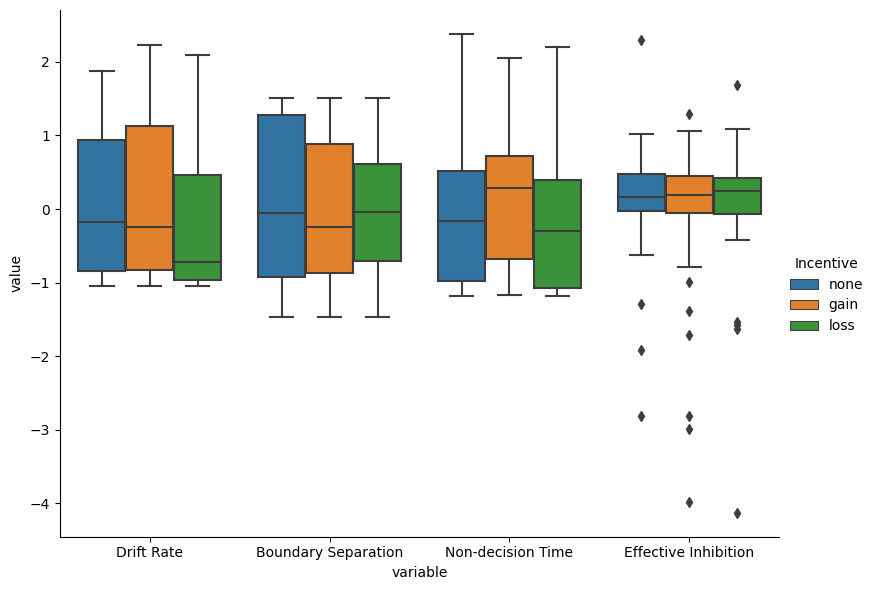

In [64]:
sns.catplot(data=df_all_melted, x="variable", y="value", hue="Incentive", kind="box", hue_order = ["none", "gain", "loss"],
            height=6, aspect=8/6)

In [85]:
print(scipy.stats.ttest_rel(df_all[df_all["Incentive"]=="none"]['Effective Inhibition'],
                            df_all[df_all["Incentive"]=="loss"]['Effective Inhibition']))


Ttest_relResult(statistic=0.4764230565620508, pvalue=0.6368205961844047)


In [86]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=df_all, depvar='Drift Rate', subject='Participant', within=['Incentive']).fit())
print(AnovaRM(data=df_all, depvar='Boundary Separation', subject='Participant', within=['Incentive']).fit())
print(AnovaRM(data=df_all, depvar='Non-decision Time', subject='Participant', within=['Incentive']).fit())
print(AnovaRM(data=df_all, depvar='Effective Inhibition', subject='Participant', within=['Incentive']).fit())


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  4.1524 2.0000 68.0000 0.0199

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  0.1196 2.0000 68.0000 0.8875

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  1.6560 2.0000 68.0000 0.1985

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  1.2117 2.0000 68.0000 0.3040



In [50]:
# use DDM to perform same analysis
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Participant', 'Difficulty','Incentive', 'Drift Rate',
                                 'Boundary Separation','Non-decision Time'],)

#i=1
for i in range(35):
    for j in range(1):
        for k in range(3):

            print(i)
            df_sub = df[df["s"]==(i+1)]
            df_sub_cond = df_sub[df_sub["Diff"]==Difficulty[j]]
            df_sub_cond = df_sub_cond[df_sub_cond["Inc"]==Incentive[k]]
            
            samp = Sample.from_pandas_dataframe(df_sub_cond, rt_column_name="RT", correct_column_name="iscorrect")

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftConstant(drift=Fittable(minval=0, maxval=4)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=3)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.001, dt=.001, T_dur=2.1)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)

            df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({
                                   'Participant': i+1,
                                   'Difficulty': Difficulty[j],
                                   'Incentive': Incentive[k],
                                   'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                                   'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                                   'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime'])
                                  }, index=[i+1])

            df_all = df_all.append(df_sub)
            df_all.to_csv("DDMresultBallard2019.csv")
            print(df_sub)


0


Info: Params [1.13095302e-08 8.13640629e-01 3.30565143e-01] gave 193.0800071945955


   Participant Difficulty Incentive    Drift Rate  Boundary Separation  \
1            1        med      gain  1.130953e-08             0.813641   

   Non-decision Time  
1           0.330565  
0


Info: Params [0.15266898 0.95498621 0.36545315] gave 233.44753497870622


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
1            1        med      loss    0.152669             0.954986   

   Non-decision Time  
1           0.365453  
0


Info: Params [0.09469882 0.94809847 0.39403482] gave 238.52355804713127


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
1            1        med      none    0.094699             0.948098   

   Non-decision Time  
1           0.394035  
1


Info: Params [0.28400793 0.8083813  0.52502603] gave 182.818769512023


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      gain    0.284008             0.808381   

   Non-decision Time  
2           0.525026  
1


Info: Params [0.19588818 0.81485535 0.50761845] gave 198.14810971652705


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      loss    0.195888             0.814855   

   Non-decision Time  
2           0.507618  
1


Info: Params [0.15667151 1.0093338  0.18832442] gave 252.73249735655727


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
2            2        med      none    0.156672             1.009334   

   Non-decision Time  
2           0.188324  
2


Info: Params [0.20339045 0.57139598 0.21767819] gave 90.15396020455084


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      gain     0.20339             0.571396   

   Non-decision Time  
3           0.217678  
2


Info: Params [0.10993038 0.5        0.23320545] gave 25.44152684574393


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      loss     0.10993                  0.5   

   Non-decision Time  
3           0.233205  
2


Info: Params [0.14537702 0.5        0.22410027] gave -9.401281338730747


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
3            3        med      none    0.145377                  0.5   

   Non-decision Time  
3             0.2241  
3


Info: Params [0.50661021 0.76962825 0.28766263] gave 146.9907058285896


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      gain     0.50661             0.769628   

   Non-decision Time  
4           0.287663  
3


Info: Params [0.45672852 0.74176032 0.22588688] gave 159.21733362865234


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      loss    0.456729              0.74176   

   Non-decision Time  
4           0.225887  
3


Info: Params [0.42835508 0.73106659 0.22533414] gave 161.0593027862119


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
4            4        med      none    0.428355             0.731067   

   Non-decision Time  
4           0.225334  
4


Info: Params [0.         0.62320607 0.32305052] gave 119.23101269779339


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      gain         0.0             0.623206   

   Non-decision Time  
5           0.323051  
4


Info: Params [0.         0.60444853 0.38236882] gave 108.47955230291754


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      loss         0.0             0.604449   

   Non-decision Time  
5           0.382369  
4


Info: Params [0.10236918 0.53338442 0.39501985] gave 76.88331254354271


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
5            5        med      none    0.102369             0.533384   

   Non-decision Time  
5            0.39502  
5


Info: Params [0.55372073 0.87853032 0.27969205] gave 193.42313250591374


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      gain    0.553721              0.87853   

   Non-decision Time  
6           0.279692  
5


Info: Params [0.         0.91014464 0.19878811] gave 233.61599166995603


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      loss         0.0             0.910145   

   Non-decision Time  
6           0.198788  
5


Info: Params [0.42829864 0.89147301 0.19576876] gave 104.43286759476196


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
6            6        med      none    0.428299             0.891473   

   Non-decision Time  
6           0.195769  
6


Info: Params [0.06947525 0.86608186 0.20349481] gave 225.08920287184185


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      gain    0.069475             0.866082   

   Non-decision Time  
7           0.203495  
6


Info: Params [0.         0.72720309 0.379386  ] gave 166.0212522675096


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      loss         0.0             0.727203   

   Non-decision Time  
7           0.379386  
6


Info: Params [0.27569149 0.82531876 0.21742972] gave 205.65106232849473


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
7            7        med      none    0.275691             0.825319   

   Non-decision Time  
7            0.21743  
7


Info: Params [1.12780663 0.67488197 0.54692736] gave 70.70576969943427


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      gain    1.127807             0.674882   

   Non-decision Time  
8           0.546927  
7


Info: Params [1.10114338 0.60554099 0.51652642] gave 44.17248414060183


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      loss    1.101143             0.605541   

   Non-decision Time  
8           0.516526  
7


Info: Params [0.8366819  0.66457538 0.44162901] gave 86.86286541936688


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
8            8        med      none    0.836682             0.664575   

   Non-decision Time  
8           0.441629  
8


Info: Params [0.         0.54085835 0.25240027] gave 63.21539449796544


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      gain         0.0             0.540858   

   Non-decision Time  
9             0.2524  
8


Info: Params [0.         0.580602   0.22737314] gave 82.38202304122171


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      loss         0.0             0.580602   

   Non-decision Time  
9           0.227373  
8


Info: Params [0.         0.58319574 0.21436943] gave 93.50957703953443


   Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
9            9        med      none         0.0             0.583196   

   Non-decision Time  
9           0.214369  
9


Info: Params [0.4683931  0.67372943 0.49287451] gave 124.87916363513003


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      gain    0.468393             0.673729   

    Non-decision Time  
10           0.492875  
9


Info: Params [0.14273141 0.67579753 0.31624949] gave 132.31469107932097


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      loss    0.142731             0.675798   

    Non-decision Time  
10           0.316249  
9


Info: Params [0.29804223 0.72460693 0.34533316] gave 156.99882430722687


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
10           10        med      none    0.298042             0.724607   

    Non-decision Time  
10           0.345333  
10


Info: Params [1.25787717 0.94282483 0.42722709] gave 125.06276900714948


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      gain    1.257877             0.942825   

    Non-decision Time  
11           0.427227  
10


Info: Params [1.14626327 0.85074227 0.42287651] gave 119.76607196048471


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      loss    1.146263             0.850742   

    Non-decision Time  
11           0.422877  
10


Info: Params [1.19142092 1.00109584 0.47122183] gave 142.0242552543639


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
11           11        med      none    1.191421             1.001096   

    Non-decision Time  
11           0.471222  
11


Info: Params [0.06091355 0.56508821 0.21753182] gave 88.05856979220503


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      gain    0.060914             0.565088   

    Non-decision Time  
12           0.217532  
11


Info: Params [0.02115822 0.55525077 0.23557926] gave 84.75457515787363


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      loss    0.021158             0.555251   

    Non-decision Time  
12           0.235579  
11


Info: Params [0.         0.62649693 0.26294718] gave 128.463275852911


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
12           12        med      none         0.0             0.626497   

    Non-decision Time  
12           0.262947  
12


Info: Params [0.60578902 0.87066308 0.39774443] gave 200.14054147076865


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      gain    0.605789             0.870663   

    Non-decision Time  
13           0.397744  
12


Info: Params [1.20153597 0.79547313 0.36952829] gave 100.17028318648055


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      loss    1.201536             0.795473   

    Non-decision Time  
13           0.369528  
12


Info: Params [0.77408177 0.720973   0.39133371] gave 136.67125525794665


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
13           13        med      none    0.774082             0.720973   

    Non-decision Time  
13           0.391334  
13


Info: Params [1.04809996 0.86038604 0.28266876] gave 130.22294348567124


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      gain      1.0481             0.860386   

    Non-decision Time  
14           0.282669  
13


Info: Params [0.         0.96029786 0.34047055] gave 255.33020164991007


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      loss         0.0             0.960298   

    Non-decision Time  
14           0.340471  
13


Info: Params [1.03040654 0.88722976 0.3969171 ] gave 146.676941475483


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
14           14        med      none    1.030407              0.88723   

    Non-decision Time  
14           0.396917  
14


Info: Params [1.00477339 0.81991151 0.43205523] gave 140.62638586076685


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      gain    1.004773             0.819912   

    Non-decision Time  
15           0.432055  
14


Info: Params [0.99779065 0.75249452 0.38594735] gave 116.78430995945173


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      loss    0.997791             0.752495   

    Non-decision Time  
15           0.385947  
14


Info: Params [1.24139008 0.9199942  0.48980047] gave 121.03528022940358


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
15           15        med      none     1.24139             0.919994   

    Non-decision Time  
15             0.4898  
15


Info: Params [0.28564945 0.82957355 0.13811312] gave 131.65734586581706


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      gain    0.285649             0.829574   

    Non-decision Time  
16           0.138113  
15


Info: Params [0.11502166 0.87563682 0.12566726] gave 141.4565141075303


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      loss    0.115022             0.875637   

    Non-decision Time  
16           0.125667  
15


Info: Params [0.29057353 0.6846155  0.18339163] gave 109.15075094229445


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
16           16        med      none    0.290574             0.684616   

    Non-decision Time  
16           0.183392  
16


Info: Params [0.07505911 0.74976511 0.28213366] gave 189.56206893152049


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      gain    0.075059             0.749765   

    Non-decision Time  
17           0.282134  
16


Info: Params [0.21989611 0.69620701 0.40026284] gave 168.5653124836901


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      loss    0.219896             0.696207   

    Non-decision Time  
17           0.400263  
16


Info: Params [0.01676624 0.67835448 0.26055181] gave 151.72594456115732


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
17           17        med      none    0.016766             0.678354   

    Non-decision Time  
17           0.260552  
17


Info: Params [1.54538569 0.70297414 0.39824893] gave 36.19819038792589


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      gain    1.545386             0.702974   

    Non-decision Time  
18           0.398249  
17


Info: Params [0.         0.66748464 0.39037819] gave 103.290288093005


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      loss         0.0             0.667485   

    Non-decision Time  
18           0.390378  
17


Info: Params [1.00398911 0.69499055 0.25701451] gave 79.83930005863363


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
18           18        med      none    1.003989             0.694991   

    Non-decision Time  
18           0.257015  
18


Info: Params [0.04136912 0.7402643  0.18319628] gave 140.04371216971327


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      gain    0.041369             0.740264   

    Non-decision Time  
19           0.183196  
18


Info: Params [0.17033249 0.83231526 0.19720124] gave 144.79611639999646


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      loss    0.170332             0.832315   

    Non-decision Time  
19           0.197201  
18


Info: Params [0.0673358  0.78541211 0.19546769] gave 174.98006960194158


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
19           19        med      none    0.067336             0.785412   

    Non-decision Time  
19           0.195468  
19


Info: Params [0.21212136 0.82580931 0.33452475] gave 213.43986122073855


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      gain    0.212121             0.825809   

    Non-decision Time  
20           0.334525  
19


Info: Params [0.26387403 0.75937832 0.28364439] gave 179.42988380678807


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      loss    0.263874             0.759378   

    Non-decision Time  
20           0.283644  
19


Info: Params [0.30896856 0.77994486 0.29985027] gave 180.3327613290814


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
20           20        med      none    0.308969             0.779945   

    Non-decision Time  
20            0.29985  
20


Info: Params [0.92009523 0.85052023 0.41481614] gave 163.1132656393819


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      gain    0.920095              0.85052   

    Non-decision Time  
21           0.414816  
20


Info: Params [0.88989346 0.73732807 0.44749721] gave 130.49326931579859


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      loss    0.889893             0.737328   

    Non-decision Time  
21           0.447497  
20


Info: Params [0.79097338 0.77801893 0.39066117] gave 135.9445090414183


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
21           21        med      none    0.790973             0.778019   

    Non-decision Time  
21           0.390661  
21


Info: Params [1.33570334 0.67909393 0.37664361] gave 43.67718072898903


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      gain    1.335703             0.679094   

    Non-decision Time  
22           0.376644  
21


Info: Params [0.70009451 0.69515884 0.42438983] gave 126.39253108116453


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      loss    0.700095             0.695159   

    Non-decision Time  
22            0.42439  
21


Info: Params [1.25602777 0.67497298 0.41899578] gave 64.63601521197563


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
22           22        med      none    1.256028             0.674973   

    Non-decision Time  
22           0.418996  
22


Info: Params [0.0835433  0.82108048 0.19286927] gave 182.1266529516769


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      gain    0.083543              0.82108   

    Non-decision Time  
23           0.192869  
22


Info: Params [0.16707804 0.82549923 0.16792136] gave 183.35862286130336


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      loss    0.167078             0.825499   

    Non-decision Time  
23           0.167921  
22


Info: Params [0.0294042  0.78939442 0.24394072] gave 199.51178468095105


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
23           23        med      none    0.029404             0.789394   

    Non-decision Time  
23           0.243941  
23


Info: Params [0.20105438 0.81153275 0.47658659] gave 186.90993867664213


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      gain    0.201054             0.811533   

    Non-decision Time  
24           0.476587  
23


Info: Params [0.         0.69449447 0.57890391] gave 145.77496337126595


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      loss         0.0             0.694494   

    Non-decision Time  
24           0.578904  
23


Info: Params [0.14614904 0.80288032 0.3411613 ] gave 142.23389743925247


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
24           24        med      none    0.146149              0.80288   

    Non-decision Time  
24           0.341161  
24


Info: Params [1.17132915 0.60651586 0.38079713] gave 51.23912675603617


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      gain    1.171329             0.606516   

    Non-decision Time  
25           0.380797  
24


Info: Params [1.45955261 0.71768287 0.34024428] gave 53.01094676563353


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      loss    1.459553             0.717683   

    Non-decision Time  
25           0.340244  
24


Info: Params [0.63079772 0.58271467 0.36242828] gave 77.5379824101261


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
25           25        med      none    0.630798             0.582715   

    Non-decision Time  
25           0.362428  
25


Info: Params [0.93309101 0.75684376 0.41201934] gave 118.27072253168829


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      gain    0.933091             0.756844   

    Non-decision Time  
26           0.412019  
25


Info: Params [0.96681665 0.69204737 0.32026141] gave 92.1561337661876


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      loss    0.966817             0.692047   

    Non-decision Time  
26           0.320261  
25


Info: Params [0.84314624 0.74544891 0.47475876] gave 125.33528391824149


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
26           26        med      none    0.843146             0.745449   

    Non-decision Time  
26           0.474759  
26


Info: Params [1.13778014 0.81768467 0.46821277] gave 115.41878737383061


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      gain     1.13778             0.817685   

    Non-decision Time  
27           0.468213  
26


Info: Params [0.70043207 0.7818012  0.53507483] gave 148.92838681779398


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      loss    0.700432             0.781801   

    Non-decision Time  
27           0.535075  
26


Info: Params [1.19640581 0.81351894 0.5118345 ] gave 109.60142182393264


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
27           27        med      none    1.196406             0.813519   

    Non-decision Time  
27           0.511834  
27


Info: Params [0.         0.92418294 0.2671601 ] gave 243.10876535043994


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      gain         0.0             0.924183   

    Non-decision Time  
28            0.26716  
27


Info: Params [0.11032166 0.88021844 0.28554091] gave 228.0384296537265


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      loss    0.110322             0.880218   

    Non-decision Time  
28           0.285541  
27


Info: Params [0.23442003 0.90812945 0.25865786] gave 228.8981484849962


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
28           28        med      none     0.23442             0.908129   

    Non-decision Time  
28           0.258658  
28


Info: Params [0.74287061 0.71856334 0.51062101] gave 132.68621636935413


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      gain    0.742871             0.718563   

    Non-decision Time  
29           0.510621  
28


Info: Params [0.         0.98110211 0.18296147] gave 256.0023241962394


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      loss         0.0             0.981102   

    Non-decision Time  
29           0.182961  
28


Info: Params [0.43675355 0.90529464 0.52057428] gave 225.07601586129456


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
29           29        med      none    0.436754             0.905295   

    Non-decision Time  
29           0.520574  
29


Info: Params [1.63839145 0.7775277  0.48325492] gave 39.9848535564678


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      gain    1.638391             0.777528   

    Non-decision Time  
30           0.483255  
29


Info: Params [0.38484569 0.77129498 0.39547304] gave 171.16695771787084


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      loss    0.384846             0.771295   

    Non-decision Time  
30           0.395473  
29


Info: Params [1.06837411 0.6808894  0.49170567] gave 81.4687028198587


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
30           30        med      none    1.068374             0.680889   

    Non-decision Time  
30           0.491706  
30


Info: Params [0.13001274 0.85671632 0.44341721] gave 212.01339185991648


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      gain    0.130013             0.856716   

    Non-decision Time  
31           0.443417  
30


Info: Params [0.5835729  0.90664078 0.33207726] gave 201.68323520670398


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      loss    0.583573             0.906641   

    Non-decision Time  
31           0.332077  
30


Info: Params [0.54593794 0.93494043 0.441817  ] gave 203.45688947095346


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
31           31        med      none    0.545938              0.93494   

    Non-decision Time  
31           0.441817  
31


Info: Params [0.99623466 0.75249732 0.43114835] gave 107.32683917118085


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      gain    0.996235             0.752497   

    Non-decision Time  
32           0.431148  
31


Info: Params [0.68448275 0.88890509 0.33668687] gave 188.03865430807014


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      loss    0.684483             0.888905   

    Non-decision Time  
32           0.336687  
31


Info: Params [1.20050811 0.66212307 0.46084656] gave 65.07698541842987


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
32           32        med      none    1.200508             0.662123   

    Non-decision Time  
32           0.460847  
32


Info: Params [0.16492815 0.77639934 0.25107136] gave 194.1237306299364


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      gain    0.164928             0.776399   

    Non-decision Time  
33           0.251071  
32


Info: Params [0.049816   0.72331544 0.21954162] gave 164.46101503923248


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      loss    0.049816             0.723315   

    Non-decision Time  
33           0.219542  
32


Info: Params [0.06892289 0.66751454 0.2658056 ] gave 144.34876277357117


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
33           33        med      none    0.068923             0.667515   

    Non-decision Time  
33           0.265806  
33


Info: Params [1.12041265 0.63178307 0.48359897] gave 53.28084368632996


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      gain    1.120413             0.631783   

    Non-decision Time  
34           0.483599  
33


Info: Params [0.82445252 0.80818669 0.35123126] gave 139.30057826207673


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      loss    0.824453             0.808187   

    Non-decision Time  
34           0.351231  
33


Info: Params [1.0797685  0.7091795  0.46019393] gave 77.2488996028618


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
34           34        med      none    1.079769             0.709179   

    Non-decision Time  
34           0.460194  
34


Info: Params [0.34014319 0.75963709 0.2612948 ] gave 166.88543513147815


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      gain    0.340143             0.759637   

    Non-decision Time  
35           0.261295  
34


Info: Params [0.09491543 0.72224815 0.2802782 ] gave 173.76597238798936


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      loss    0.094915             0.722248   

    Non-decision Time  
35           0.280278  
34


Info: Params [0.12362625 0.73883673 0.26416267] gave 179.13584540443804


    Participant Difficulty Incentive  Drift Rate  Boundary Separation  \
35           35        med      none    0.123626             0.738837   

    Non-decision Time  
35           0.264163  


In [68]:
df_all = pd.read_csv("DDMresultBallard2019.csv")

df_all_melted = pd.melt(df_all, id_vars=['Participant', 'Incentive'], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'])

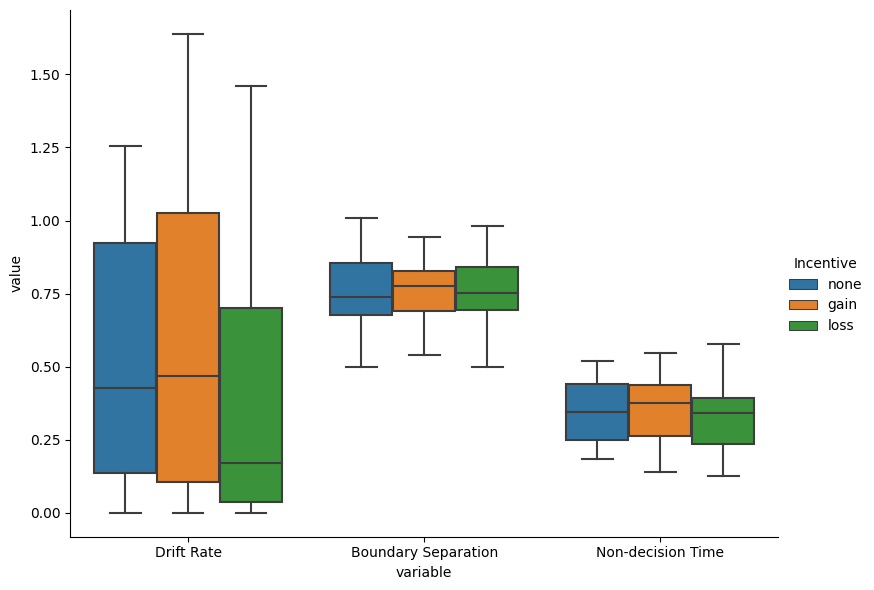

In [53]:
sns.catplot(data=df_all_melted, x="variable", y="value", hue="Incentive", kind="box", hue_order = ["none", "gain", "loss"],
            height=6, aspect=8/6)

In [69]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=df_all, depvar='Drift Rate', subject='Participant', within=['Incentive']).fit())
print(AnovaRM(data=df_all, depvar='Boundary Separation', subject='Participant', within=['Incentive']).fit())
print(AnovaRM(data=df_all, depvar='Non-decision Time', subject='Participant', within=['Incentive']).fit())


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  4.8846 2.0000 68.0000 0.0104

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  0.0221 2.0000 68.0000 0.9782

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
Incentive  0.7711 2.0000 68.0000 0.4665

